# Install Dependencies and setup

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Load Image
TO DO: Collect a dataset of facial expressions and hand gestures labeled with pain or no pain.

In [2]:
# Define the directory containing the images
data_dir = 'Image_folder'

In [3]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 268 files belonging to 2 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

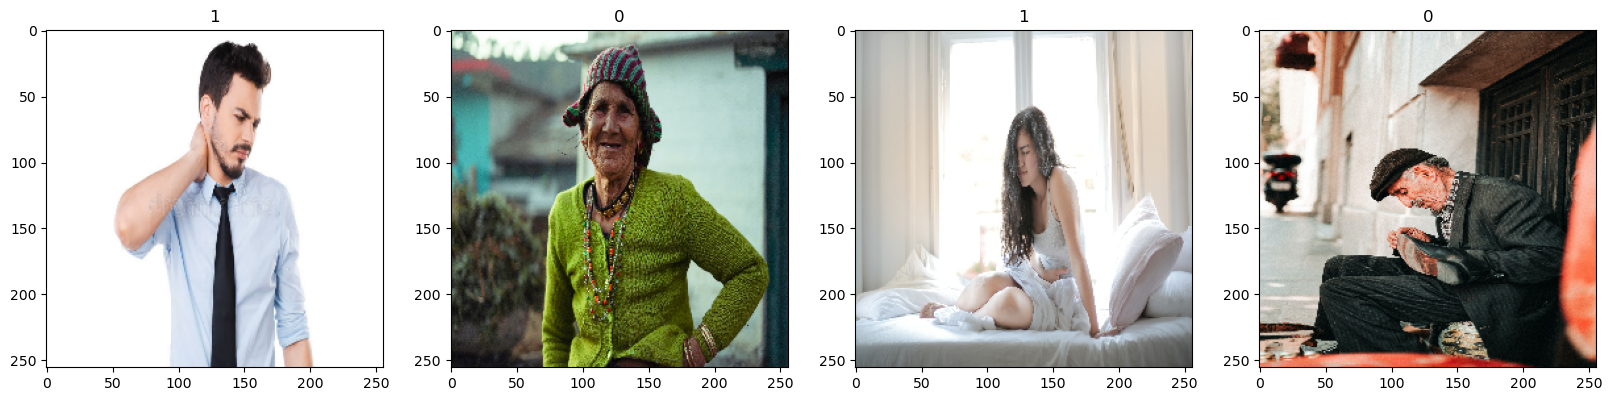

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

0 - N0 pain
1 - pain

# preprocess the data
scale the data

In [7]:
data = data.map(lambda x,y: (x/255, y))

In [8]:
scaled_iterator = data.as_numpy_iterator()

In [9]:
batch = scaled_iterator.next()

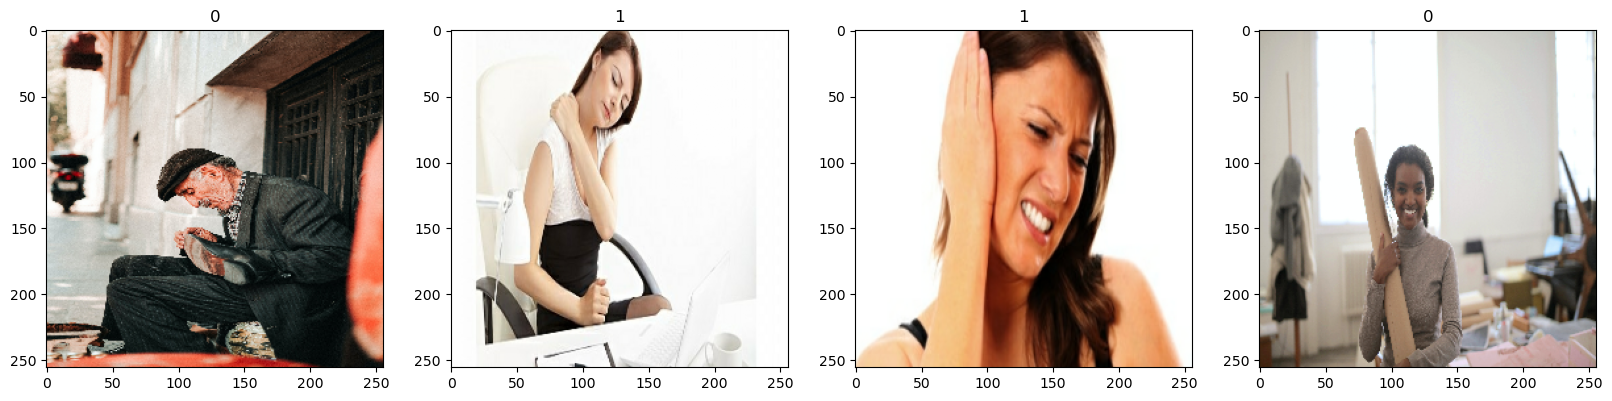

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# split data

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]) 

Epoch 1/20
6/6 [==============================] - 27s 3s/step - loss: 1.6652 - accuracy: 0.4688 - val_loss: 0.6804 - val_accuracy: 0.5625
Epoch 2/20
6/6 [==============================] - 27s 3s/step - loss: 0.6972 - accuracy: 0.5052 - val_loss: 0.6923 - val_accuracy: 0.5469
Epoch 3/20
6/6 [==============================] - 28s 3s/step - loss: 0.6911 - accuracy: 0.5938 - val_loss: 0.6896 - val_accuracy: 0.4688
Epoch 4/20
6/6 [==============================] - 29s 3s/step - loss: 0.6875 - accuracy: 0.4844 - val_loss: 0.6749 - val_accuracy: 0.6719
Epoch 5/20
6/6 [==============================] - 30s 3s/step - loss: 0.6704 - accuracy: 0.6198 - val_loss: 0.6416 - val_accuracy: 0.7500
Epoch 6/20
6/6 [==============================] - 32s 3s/step - loss: 0.6370 - accuracy: 0.7135 - val_loss: 0.5824 - val_accuracy: 0.7969
Epoch 7/20
6/6 [==============================] - 33s 3s/step - loss: 0.6067 - accuracy: 0.7083 - val_loss: 0.6028 - val_accuracy: 0.7656
Epoch 8/20
6/6 [==================

# Plot Performance

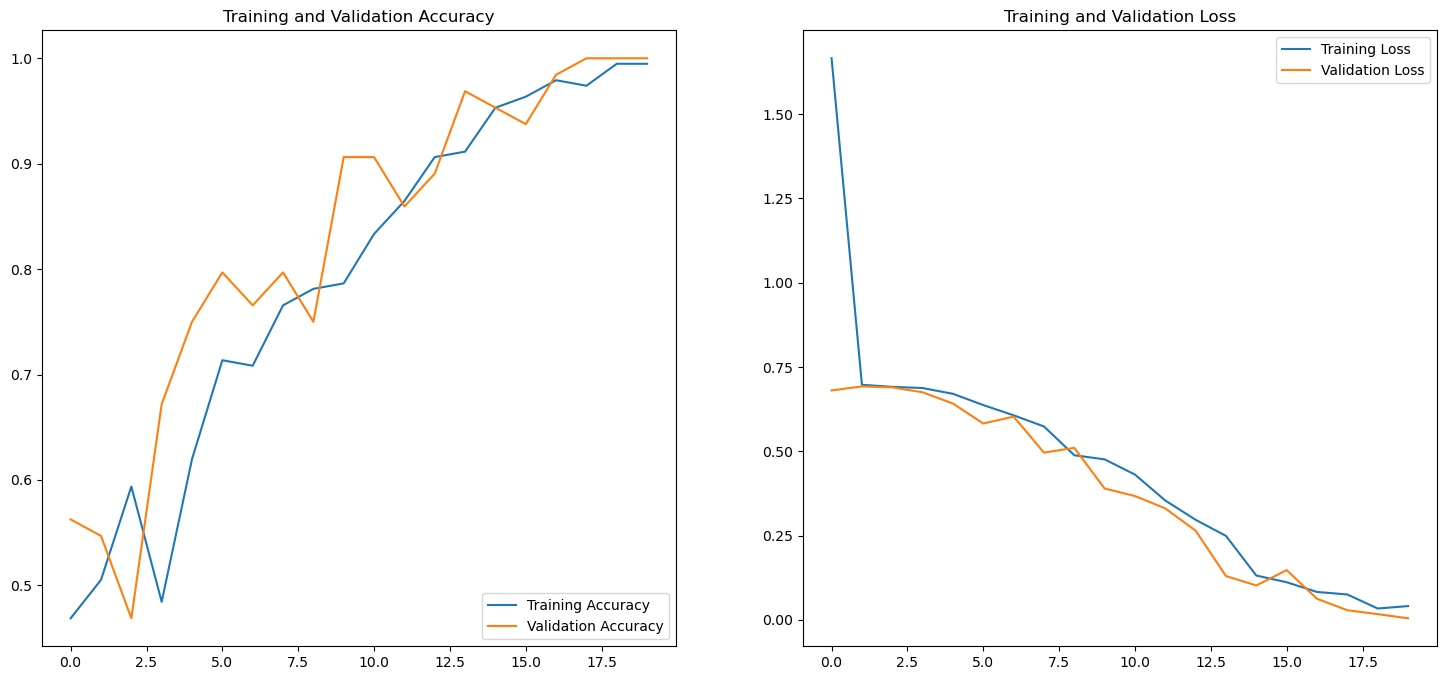

In [34]:
#Visualize training results
epochs=20
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
precision = Precision()
recall = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    prediction = model.predict(X)
    precision.update_state(y, prediction )
    recall.update_state(y, prediction )
    acc.update_state(y, prediction )

1/1 [==============================] - 0s 224ms/step


In [38]:
print(precision.result(), recall.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [39]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

1/1 [==============================] - 10s 10s/step - loss: 0.0076 - accuracy: 1.0000
Test loss: 0.007571657653898001
Test accuracy: 1.0


Test on random image

Image:1

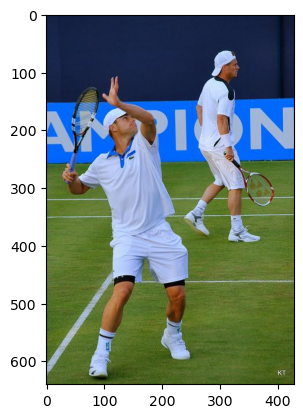

In [40]:
img = cv2.imread('COCO_train2014_000000006749.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

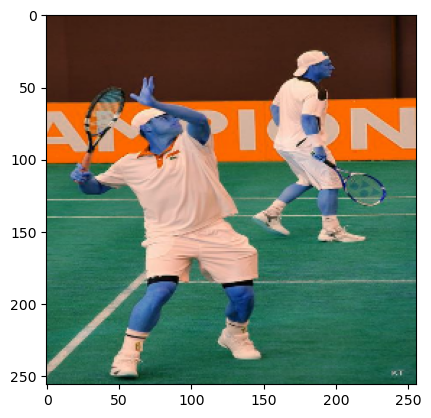

In [41]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
prediction = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 44ms/step


In [43]:
prediction

array([[0.14789814]], dtype=float32)

In [44]:
if prediction > 0.5: 
    print(f'Predicted class is Pain')
else:
    print(f'Predicted class is No Pain')

Predicted class is No Pain


Image:2

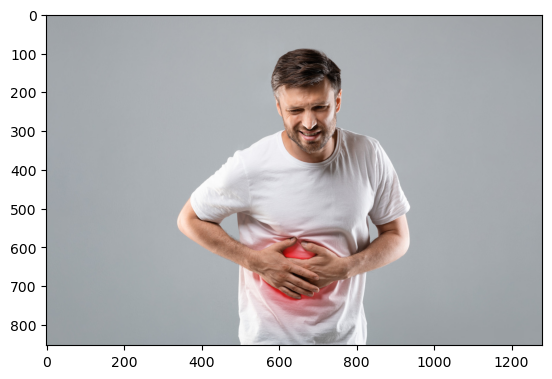

In [49]:
img = cv2.imread('does-fatty-liver-cause-pain.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

1/1 [==============================] - 0s 25ms/step


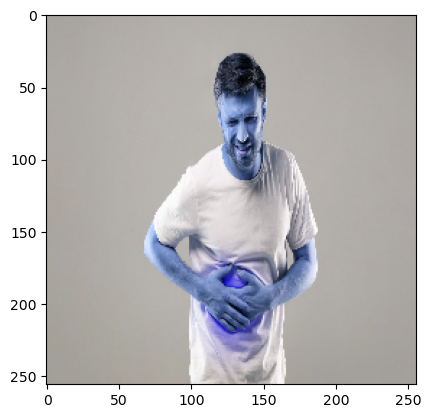

In [50]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
prediction = model.predict(np.expand_dims(resize/255, 0))

In [51]:
prediction

array([[0.95988315]], dtype=float32)

In [52]:
if prediction > 0.5: 
    print(f'Predicted class is Pain')
else:
    print(f'Predicted class is No Pain')

Predicted class is Pain


# Save the Model

In [3]:
from tensorflow.keras.models import load_model

In [4]:
# Save the model
model.save('pain_detection_model.h5')

NameError: name 'model' is not defined

In [55]:
new_model = load_model('pain_detection_model.h5')

In [56]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 131ms/step


array([[0.95988315]], dtype=float32)

In [2]:
# Load the saved model
#loaded_model = tf.keras.models.load_model('pain_detection_model.h5')